In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
import torch
from torchvision import transforms


image = Image.open('/workspace/joonsm/025524.png')

# 변환 파이프라인 설정
transform = transforms.Compose([
    transforms.Resize((360,360)), 
    transforms.ToTensor()  
])

# 이미지 변환
image_tensor = transform(image)[:3,:,:]
print(image_tensor.shape)  # 텐서의 크기 출력

torch.Size([3, 360, 360])


In [3]:
img = image_tensor.unsqueeze(0)

In [4]:
from image import ImageEncoder, ImageFeatureExtractor

In [7]:
ftr = ImageEncoder(backbone_name='resnet50')

Build ImageEncoder with pos_emb='sine', d_model=256


In [5]:
ftrs = ImageFeatureExtractor(backbone_name='resnet50')

In [6]:
ftrs(img).size()

torch.Size([1, 256, 23, 23])

In [7]:
ftrs(img).size()

f_up 사이즈
torch.Size([1, 128, 23, 23])
conv22
torch.Size([1, 128, 23, 23])
여기까지3


torch.Size([1, 256, 23, 23])

In [10]:
ftrs.conv22

Conv2d(1024, 64, kernel_size=(1, 1), stride=(1, 1))

In [11]:
ftrs.conv11

Conv2d(2048, 64, kernel_size=(1, 1), stride=(1, 1))

In [12]:
ftrs.conv33

Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))

In [15]:
src = ftr(img)

In [9]:
import torch.nn as nn


In [12]:
transformer_decoder = nn.TransformerDecoder(
    decoder_layer=nn.TransformerDecoderLayer(
        d_model=256,
        nhead=8,
        batch_first=True,
        dropout=0.1,
        norm_first=True,
    ),
    num_layers=6,
)

In [27]:
transformer_decoder.layers[1]['multio']

TransformerDecoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
  )
  (multihead_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
  )
  (linear1): Linear(in_features=256, out_features=2048, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=2048, out_features=256, bias=True)
  (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (norm3): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
  (dropout3): Dropout(p=0.1, inplace=False)
)

In [28]:
b = torch.rand(1,4,256)

In [29]:
transformer_decoder(b,src).size()

torch.Size([1, 4, 256])

In [350]:
from dataset import ImageLayout

In [354]:
from torch.utils.data import Dataset, DataLoader

In [363]:
b =DataLoader(a)

In [365]:
b

In [248]:
from torch.utils.data import Dataset
import json
import random
import torch
import transformers
from PIL import Image
import os
from transformers import AutoImageProcessor
import numpy as np
from torch.utils.data import Dataset
import json
import os

class ImageLayout(Dataset):
    def __init__(self, file='/nas2/lait/1000_Members/jjoonvely/carla_new/pre_seg_combined.json',type = 'train'):
        if type == 'val':
            file = '/nas2/lait/1000_Members/jjoonvely/carla_new/pre_seg_combined_val.json'
        # 나중에 구축할 데이터셋에 맞게 frmae_list 에 이름 추가하는 부분 수정 필요
        with open(file, 'r') as f:
            self.raw_data = json.load(f)
        self.path = '/nas2/lait/1000_Members/jjoonvely/carla_new'
        # self.idx = list(self.raw_data.keys())
        # idx 를 받아서 폴더까지 찾게끔 코드를 작성해보자.
        self.frame_list = []
        self.box_list = []
        for idx in self.raw_data.keys():
            if self.raw_data[idx]['type']==[["vehicle.tesla.cybertruck"]]:
                pass
            else:
                for img in self.raw_data[idx]['inpaint_frames_seg']:
                    # Window 에서 전처리하면서 생기는 \\ 처리
                    self.frame_list.append(img.replace('\\','/'))
                for box in self.raw_data[idx]['boxes']:
                    self.box_list.append(box)
        self.image_processor = AutoImageProcessor.from_pretrained('facebook/dinov2-base')
    def __len__(self):
        return len(self.frame_list)
    def __getitem__(self, index):
        img_path = os.path.join(self.path,self.frame_list[index])
        name = self.frame_list[index]
        img = Image.open(img_path)
        W, H = img.size
        img = torch.tensor(self.image_processor(img)['pixel_values'][0])
        box = self.box_list[index]
        inst = template.format(x=box[0],y=box[1],width=box[2],height=box[3])
        instruct,answer = split_string_by_delimiter(inst,'<MID>')
        res = {
            'input' : instruct,
            'labels' : answer,
            'image' : img,
            'name' : name
        }
        return res
dataset = ImageLayout()


In [249]:
dataset.__len__()

154831

In [292]:
index=0

In [293]:
box

[574, 379, 92, 89]

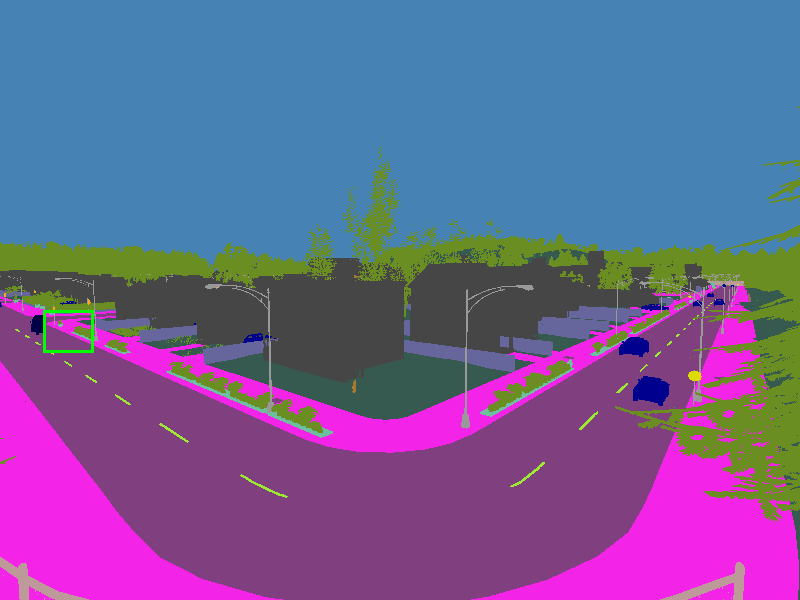

In [348]:
from PIL import ImageDraw
index +=1
box = dataset.box_list[index]
path = '/nas2/lait/1000_Members/jjoonvely/carla_new'
img_path = os.path.join(path,dataset.frame_list[index])
img = Image.open(img_path)
draw = ImageDraw.Draw(img)
draw.rectangle([box[0]-box[2]/2,box[1]-box[3]/2,box[0]+box[2]/2,box[1]+box[3]/2], outline=(0,255,0), width = 3)
# draw.rectangle([box[0],box[1],box[0]+box[2],box[1]+box[3]], outline=(0,255,0), width = 3)
img


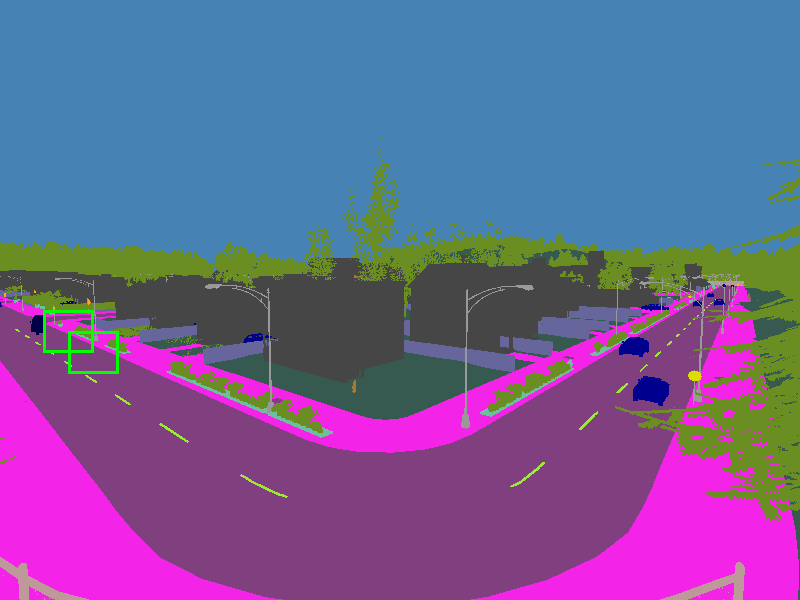

In [349]:
draw.rectangle([box[0],box[1],box[0]+box[2],box[1]+box[3]], outline=(0,255,0), width = 3)
img